In [1]:
import os
import tensorflow as tf
from CRPM_Net import CRPM_Net

In [2]:
#  network config

flags = tf.flags

flags.DEFINE_float("clip",              80,          "Gradient clip")
flags.DEFINE_float("keep_prob",         0.5,         "Dropout rate")
flags.DEFINE_float("image_size",        22,          "image size")
flags.DEFINE_float("num_channel",       18,          "num_channel")
flags.DEFINE_float("num_tags",          16,          "tag_num")
flags.DEFINE_float("batch_size",        5,           "batch size") 
flags.DEFINE_float("test_batch_size",   10,          "batch size for test data")
flags.DEFINE_float("learning_rate",     0.01,        "Initial learning rate")
flags.DEFINE_float("regularation_rate", 0.001 ,      "Initial learning rate")
flags.DEFINE_float("decay_rate",        0.96,        "decay rate")
flags.DEFINE_string("model_path",       "model/model.ckpt",   "Path to save model")
flags.DEFINE_string("logger_path",      "train.log", "File for log")
flags.DEFINE_string("optimizer",        "adam",      "Optimizer for training")
flags.DEFINE_integer("max_epoch",       1000,        "maximum training epochs")
flags.DEFINE_integer("steps_check",     100,         "steps per checkpoint")
flags.DEFINE_string("mode",             "test2",     "mode of the LSTM Net")
flags.DEFINE_string("train_data_file",  "train.plk", "Path for train data")
flags.DEFINE_string("dev_data_file",    "test.plk",  "Path for dev data")
flags.DEFINE_string("raw_path",         "data/Flavoland",      "Path for dev data")
flags.DEFINE_string("label_path",       "data/label.mat",      "Path for dev data")

In [3]:
FLAGS = tf.app.flags.FLAGS
assert FLAGS.clip < 100.1, "gradient clip should't be too much"
assert 0 <= FLAGS.keep_prob < 1, "dropout rate between 0 and 1"
assert FLAGS.learning_rate > 0, "learning rate must larger than zero"
assert FLAGS.optimizer in ["adam", "sgd", "adagrad"]
assert FLAGS.mode in ["train", "test1","test2", "dilate"]

In [4]:
# model class init

model = CRPM_Net(batch_size=FLAGS.batch_size,image_size=FLAGS.image_size,raw_path=FLAGS.raw_path,
          num_label=FLAGS.num_tags,regularation_rate=FLAGS.regularation_rate,learning_rate=FLAGS.learning_rate,
          decay_rate=FLAGS.decay_rate,data_file=FLAGS.train_data_file,label_file=FLAGS.label_path,is_training=True,
          dev_data_file=FLAGS.dev_data_file,clip=FLAGS.clip,num_epochs=FLAGS.max_epoch,logger_path=FLAGS.logger_path,model_path=FLAGS.model_path)

In [5]:
# network init

model.build_graph()

down_conv_0/conv1
[3, 3, 18, 12]
down_conv_1/conv1
[3, 3, 12, 24]
down_conv_2/conv1
0
[None, None, None, 18]
down_conv_0/conv1
[3, 3, 18, 12]
[3, 3, 12, 12]


1
[None, None, None, 12]
down_conv_1/conv1
[3, 3, 12, 24]
[3, 3, 24, 24]


2
[None, None, None, 24]
down_conv_2/conv1
[3, 3, 48, 48]


up_conv_1/conv1
up_conv_0/conv1
output_map/conv1x1
21
[u'up_conv_1/deconv2d/weight_real:0', u'up_conv_1/deconv2d/weight_imag:0', u'up_conv_1/deconv2d/bias_real:0', u'up_conv_1/deconv2d/bias_imag:0', u'up_conv_1/conv1/weight_real:0', u'up_conv_1/conv1/weight_imag:0', u'up_conv_1/conv1/bias_real:0', u'up_conv_1/conv1/bias_imag:0', u'up_conv_0/deconv2d/weight_real:0', u'up_conv_0/deconv2d/weight_imag:0', u'up_conv_0/deconv2d/bias_real:0', u'up_conv_0/deconv2d/bias_imag:0', u'up_conv_0/conv1/weight_real:0', u'up_conv_0/conv1/weight_imag:0', u'up_conv_0/conv1/bias_real:0', u'up_conv_0/conv1/bias_imag:0', u'output_map/conv1x1/weight_real:0', u'output_map/conv1x1/weight_imag:0', u'output_map/conv1x1/bias

In [6]:
# create session and restore model

sess = model.model_restore()

[u'down_conv_0/conv1/weight_real:0', u'down_conv_0/conv1/weight_imag:0', u'down_conv_0/conv1/bias_real:0', u'down_conv_0/conv1/bias_imag:0', u'down_conv_1/conv1/weight_real:0', u'down_conv_1/conv1/weight_imag:0', u'down_conv_1/conv1/bias_real:0', u'down_conv_1/conv1/bias_imag:0', u'down_conv_2/conv1/weight_real:0', u'down_conv_2/conv1/weight_imag:0', u'down_conv_2/conv1/bias_real:0', u'down_conv_2/conv1/bias_imag:0', u'fc/fc_weight_real:0', u'fc/fc_weight_imag:0', u'fc/fc_bias_real:0', u'fc/fc_bias_imag:0', u'mold_phase/weight_model:0', u'up_conv_1/deconv2d/weight_real:0', u'up_conv_1/deconv2d/weight_imag:0', u'up_conv_1/deconv2d/bias_real:0', u'up_conv_1/deconv2d/bias_imag:0', u'up_conv_1/conv1/weight_real:0', u'up_conv_1/conv1/weight_imag:0', u'up_conv_1/conv1/bias_real:0', u'up_conv_1/conv1/bias_imag:0', u'up_conv_0/deconv2d/weight_real:0', u'up_conv_0/deconv2d/weight_imag:0', u'up_conv_0/deconv2d/bias_real:0', u'up_conv_0/deconv2d/bias_imag:0', u'up_conv_0/conv1/weight_real:0', u'u

Restoring parameters from model/model.ckpt


model restored...


image_size: (1076, 1024)
classification time: 04.933769 (s)
classification image saving...


findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans (u'/home/iecas7/Tools/Anaconda/Enter/envs/tensorflow/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


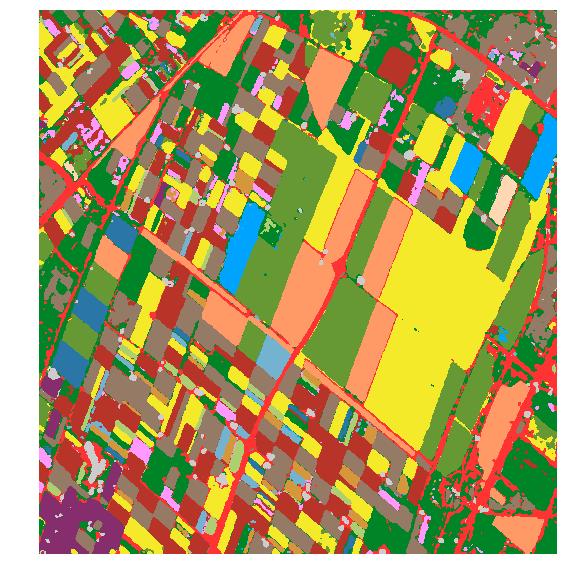

(1076, 1024)
**************Evalutation Results**************
Acc:0.966445979315
kappa:0.961002206869
FwIoU: 0.939441566459
Confusion matrix:
[ 96.6   0.    0.    0.1   0.    0.    0.2   0.    0.2   0.    0.    0.4
   0.    0.    0.4   2. ]
[  0.1  99.7   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.2   0. ]
[  0.1   0.   99.1   0.    0.    0.1   0.    0.    0.2   0.    0.    0.
   0.    0.    0.4   0.2]
[  0.1   0.    0.   99.4   0.    0.    0.2   0.    0.    0.    0.    0.
   0.    0.    0.    0.2]
[  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.]
[  0.2   0.    0.    0.    0.   98.8   0.    0.2   0.2   0.    0.    0.3
   0.    0.    0.    0.1]
[  0.4   0.    0.    0.    0.    0.   99.4   0.    0.    0.    0.    0.
   0.    0.    0.1   0. ]
[  0.3   0.    0.    0.    0.    0.    0.   98.4   1.    0.    0.    0.
   0.    0.    0.    0.2]
[  1.9   0.    0.    0.    0.    1.8   0.    0.   95.7   0.2   0.    0.
   0.    0.    0

In [7]:
# preidict  before excluding training pixels

model.test(sess)